In [25]:
import xml.etree.ElementTree as ET
from time import time
import pandas as pd
import igraph as ig
import collections
import itertools
import re

In [46]:
langs = ['Polish', 'English', 'Spanish']
books = ['MAT', 'MAR', 'LUK', 'JOH']

In [16]:
for lang in langs:
    root = ET.fromstring(open(f'xml/{lang}.xml', encoding='utf-8').read())
    with open(f'txt/{lang}.txt', 'w', encoding='utf-8') as out:        
        for book in books:
            for seg in root.findall(f'.//div[@id="b.{book}"]/*seg'):             
                out.write(seg.text.strip() + '\n')

In [44]:
for lang in langs:
    ids = collections.defaultdict(itertools.count().__next__)
    edges = set()
    words = []
    with open(f'txt/{lang}.txt', 'r', encoding='utf-8') as f:
        for line in f:
            words.extend(re.sub('[^a-z ]', '', line.lower().replace('&quot;', '')).split(' '))    
    for i, j in zip(words, words[1:]):
        source, target = ids[i], ids[j]
        if ((source, target) not in edges) and ((target, source) not in edges):
            edges.add((source, target))
    n = list(ids.values())[-1] + 1

    g = ig.Graph()
    g.add_vertices(n)
    g.add_edges(edges)
    g.save(f'net/{lang}.net')
    #ig.plot(g)

In [49]:
for lang in langs:    
    g = ig.load(f'net/{lang}.net')
    degrees = g.degree()
    row = {}
    row["Number of nodes"] = g.vcount()
    row["Number of edges"] = g.ecount()  
    row["Minimum degree"] = min(degrees) 
    row["Maximum degree"] = max(degrees) 
    row["Average degree"] = sum(degrees)/len(degrees) 
    row["Average clustering coefficient"] = g.transitivity_avglocal_undirected() 
    row["Assortativity"] = g.assortativity_degree() 
    row["Average path length"] = g.average_path_length()
    row["Diameter"] = g.diameter()
    pd.DataFrame([row]).round(4).to_csv(f'csv/{lang}.csv')

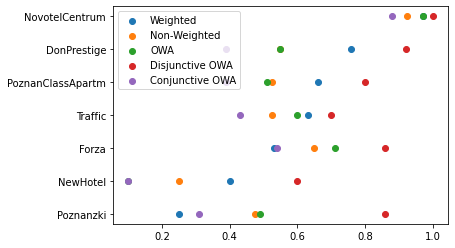

In [28]:
import matplotlib.pyplot as plt

weighted = {
    "Poznanzki": 0.25,
    "Traffic": 0.63,
    "NovotelCentrum": 0.97,
    "DonPrestige": 0.76,
    "Forza": 0.53,
    "PoznanClassApartm": 0.66,
    "NewHotel": 0.4
}
weightedSorted =  dict(sorted(weighted.items(), key=lambda x:x[1]))

simple = {
    "Poznanzki": 0.475,
    "Traffic": 0.525,
    "NovotelCentrum": 0.925,
    "DonPrestige": 0.55,
    "Forza": 0.65,
    "PoznanClassApartm": 0.525,
    "NewHotel": 0.25
}
simpleSorted =  {key: simple[key] for key in weightedSorted.keys()}

OWA = {
    "Poznanzki": 0.49,
    "Traffic": 0.6,
    "NovotelCentrum": 0.97,
    "DonPrestige": 0.55,
    "Forza": 0.71000004,
    "PoznanClassApartm": 0.51,
    "NewHotel": 0.1
}
OWASorted =  {key: OWA[key] for key in weightedSorted.keys()}

disjunctive = {
    "Poznanzki": 0.86,
    "Traffic": 0.7,
    "NovotelCentrum": 1.0,
    "DonPrestige": 0.92,
    "Forza": 0.86,
    "PoznanClassApartm": 0.8,
    "NewHotel": 0.6
}
disjunctiveSorted =  {key: disjunctive[key] for key in weightedSorted.keys()}

conjunctive = {
    "Poznanzki": 0.31,
    "Traffic": 0.43,
    "NovotelCentrum": 0.88,
    "DonPrestige": 0.39000002,
    "Forza": 0.54,
    "PoznanClassApartm": 0.39000002,
    "NewHotel": 0.1
}
conjunctiveSorted =  {key: conjunctive[key] for key in weightedSorted.keys()}

plt.scatter(weightedSorted.values(), weightedSorted.keys(), label="Weighted")
plt.scatter(simpleSorted.values(), simpleSorted.keys(), label="Non-Weighted")
plt.scatter(OWASorted.values(), OWASorted.keys(), label="OWA")
plt.scatter(disjunctiveSorted.values(), disjunctiveSorted.keys(), label="Disjunctive OWA")
plt.scatter(conjunctiveSorted.values(), conjunctiveSorted.keys(), label="Conjunctive OWA")
plt.legend()
plt.show()